# <center><u> GRU - House 20 with Exogenous Variables

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
from dotenv import load_dotenv

load_dotenv()

db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [3]:
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

In [4]:
query="""
    select * 
    from agg.tidy_data_30min
    where site = 20
"""

In [5]:
df = pd.read_sql_query(query, conn)

/var/folders/n_/s_vk866s6ds93jqhjv__r6cr0000gn/T/ipykernel_10860/1553155693.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [6]:
# Convert 'ts' to datetime and set as index
# df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.set_index('timestamp', drop=False)
df = df.sort_index()

df

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,...,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,2019-04-01 00:00:00+00:00,20,2019,4,1,1,0,0,2,198.79,...,2.0,87.0,12.0,0.0,0.0,152.86,15.4150,138.56,18.69,0
2019-04-01 00:30:00+00:00,2019-04-01 00:30:00+00:00,20,2019,4,1,1,30,0,2,250.51,...,2.0,87.0,12.0,0.0,0.0,204.52,15.3175,166.11,18.60,0
2019-04-01 01:00:00+00:00,2019-04-01 01:00:00+00:00,20,2019,4,1,2,0,0,2,194.07,...,3.0,89.0,11.0,0.0,0.0,214.66,15.8375,179.70,31.03,0
2019-04-01 01:30:00+00:00,2019-04-01 01:30:00+00:00,20,2019,4,1,2,30,0,2,245.33,...,3.0,89.0,11.0,0.0,0.0,209.72,15.8775,177.33,52.99,0
2019-04-01 02:00:00+00:00,2019-04-01 02:00:00+00:00,20,2019,4,1,3,0,0,2,223.68,...,4.0,91.0,11.0,0.0,0.0,230.59,16.3350,212.62,65.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,2020-03-31 20:30:00+00:00,20,2020,3,31,21,30,1,2,28.10,...,NaN,NaN,NaN,NaN,NaN,282.00,15.4650,264.64,19.82,0
2020-03-31 21:00:00+00:00,2020-03-31 21:00:00+00:00,20,2020,3,31,22,0,1,2,11.10,...,NaN,NaN,NaN,NaN,NaN,321.01,14.5975,220.50,16.55,0
2020-03-31 21:30:00+00:00,2020-03-31 21:30:00+00:00,20,2020,3,31,22,30,1,2,196.48,...,NaN,NaN,NaN,NaN,NaN,353.42,14.7625,206.66,30.23,0


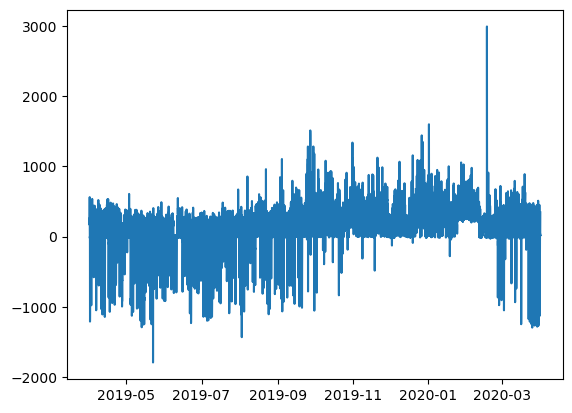

In [7]:
plt.plot(df.index, df.net_load)
plt.show()

In [8]:
df['net_load_norm'] = df['net_load'] / max(abs(df['net_load']))

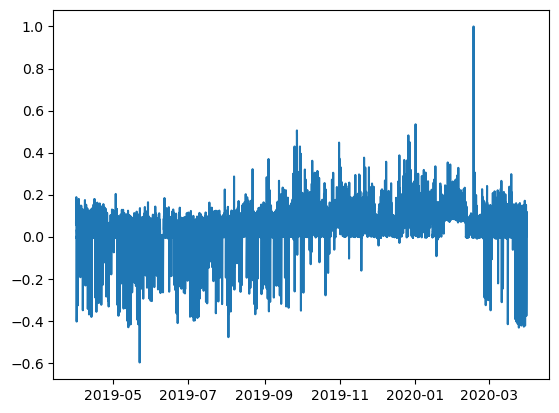

In [9]:
plt.plot(df.index, df.net_load_norm)
plt.show()

## <u> Dataset Preparation

In [10]:
##Parameters

#n_input = no. of time steps considered before making the prediction
#n_features = no. of variables/features considered
#n_output = no. of time steps to forecast

# Note: 1 time step = 30 mins
# Look at the last two weeks to forecast the next 36 hours

# 1 day = 2 * 24 * 1 = 24
# 2 hours = 2 * 2 = 8 

n_input = 144
n_features = 12
n_output = 72


# Select which features are to be inputted into the LSTM i.e., which columns in the df
df_input = df[['net_load_norm','month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load','weekend_or_bank_holiday','solar_radiation','sunshine_duration']]
df_input

,net_load_norm,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
timestamp,,,,,,,,,,
2019-04-01 00:00:00+00:00,0.066453,4,1,1,0,2,152.86,0,0.0,0.0
2019-04-01 00:30:00+00:00,0.083742,4,1,1,0,2,204.52,0,0.0,0.0
2019-04-01 01:00:00+00:00,0.064875,4,1,2,0,2,214.66,0,0.0,0.0
2019-04-01 01:30:00+00:00,0.082010,4,1,2,0,2,209.72,0,0.0,0.0
2019-04-01 02:00:00+00:00,0.074773,4,1,3,0,2,230.59,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,0.009393,3,31,21,1,2,282.00,0,NaN,NaN
2020-03-31 21:00:00+00:00,0.003711,3,31,22,1,2,321.01,0,NaN,NaN
2020-03-31 21:30:00+00:00,0.065681,3,31,22,1,2,353.42,0,NaN,NaN


In [11]:
df_input['sunshine_duration(t+48)'] = df_input['sunshine_duration'].shift(-48) #Add prediction for time the day after
df_input['solar_radiation(t+48)'] = df_input['solar_radiation'].shift(-48) #Add prediction for time the day after
df_input


/var/folders/n_/s_vk866s6ds93jqhjv__r6cr0000gn/T/ipykernel_10860/2357840067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['sunshine_duration(t+48)'] = df_input['sunshine_duration'].shift(-48) #Add prediction for time the day after
/var/folders/n_/s_vk866s6ds93jqhjv__r6cr0000gn/T/ipykernel_10860/2357840067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['solar_radiation(t+48)'] = df_input['solar_radiation'].shift(-48) #Add prediction for time the day after


,net_load_norm,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,sunshine_duration(t+48),solar_radiation(t+48)
timestamp,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,0.066453,4,1,1,0,2,152.86,0,0.0,0.0,0.0,0.0
2019-04-01 00:30:00+00:00,0.083742,4,1,1,0,2,204.52,0,0.0,0.0,0.0,0.0
2019-04-01 01:00:00+00:00,0.064875,4,1,2,0,2,214.66,0,0.0,0.0,0.0,0.0
2019-04-01 01:30:00+00:00,0.082010,4,1,2,0,2,209.72,0,0.0,0.0,0.0,0.0
2019-04-01 02:00:00+00:00,0.074773,4,1,3,0,2,230.59,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,0.009393,3,31,21,1,2,282.00,0,NaN,NaN,NaN,NaN
2020-03-31 21:00:00+00:00,0.003711,3,31,22,1,2,321.01,0,NaN,NaN,NaN,NaN
2020-03-31 21:30:00+00:00,0.065681,3,31,22,1,2,353.42,0,NaN,NaN,NaN,NaN


In [12]:
df_input.isnull().sum()

net_load_norm                0
month                        0
day                          0
hour                         0
day_of_week                  0
season                       0
avg_net_load                 0
weekend_or_bank_holiday      0
solar_radiation            494
sunshine_duration          494
sunshine_duration(t+48)    542
solar_radiation(t+48)      542
dtype: int64

In [13]:
##Weather variables are the only ones missing values, so we fill with the average value for that hour iwthin teh dataframe

df_input.index = pd.to_datetime(df_input.index, utc=True)

# Group the DataFrame by the hour and minute of the day and calculate the mean for each hour-minute combination
hourly_mean = df_input.groupby([df_input.index.hour, df_input.index.minute]).mean()

# Define a function to fill missing values with the mean for that hour-minute combination
def fill_na_with_hourly_mean(row):
    hour = row.name.hour
    minute = row.name.minute
    return hourly_mean.loc[(hour, minute)]

# Apply the fill_na_with_hourly_mean function to fill missing values
df_input = df_input.apply(lambda row: fill_na_with_hourly_mean(row) if pd.isna(row).any() else row, axis=1)

In [14]:
df_input.isnull().sum()

net_load_norm              0
month                      0
day                        0
hour                       0
day_of_week                0
season                     0
avg_net_load               0
weekend_or_bank_holiday    0
solar_radiation            0
sunshine_duration          0
sunshine_duration(t+48)    0
solar_radiation(t+48)      0
dtype: int64

In [15]:
df_input

,net_load_norm,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,sunshine_duration(t+48),solar_radiation(t+48)
timestamp,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,0.066453,4.000000,1.000000,1.0,0.000000,2.0,152.860000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-01 00:30:00+00:00,0.083742,4.000000,1.000000,1.0,0.000000,2.0,204.520000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-01 01:00:00+00:00,0.064875,4.000000,1.000000,2.0,0.000000,2.0,214.660000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-01 01:30:00+00:00,0.082010,4.000000,1.000000,2.0,0.000000,2.0,209.720000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-01 02:00:00+00:00,0.074773,4.000000,1.000000,3.0,0.000000,2.0,230.590000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,0.068494,6.513661,15.756831,21.0,2.986339,2.5,277.816858,0.284153,0.373596,1.578652,1.583099,0.374648
2020-03-31 21:00:00+00:00,0.079512,6.513661,15.756831,22.0,2.986339,2.5,260.204836,0.284153,0.000000,0.000000,0.000000,0.000000
2020-03-31 21:30:00+00:00,0.075038,6.513661,15.756831,22.0,2.986339,2.5,282.622486,0.284153,0.000000,0.000000,0.000000,0.000000


In [16]:
#Scale Average Net Load
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_input['avg_net_load'] = scaler.fit_transform(df_input[['avg_net_load']])
df_input.rename(columns={'net_load_norm': 'net_load'}, inplace=True)

In [17]:
df_input

,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,sunshine_duration(t+48),solar_radiation(t+48)
timestamp,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,0.066453,4.000000,1.000000,1.0,0.000000,2.0,0.979311,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-01 00:30:00+00:00,0.083742,4.000000,1.000000,1.0,0.000000,2.0,0.980777,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-01 01:00:00+00:00,0.064875,4.000000,1.000000,2.0,0.000000,2.0,0.981065,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-01 01:30:00+00:00,0.082010,4.000000,1.000000,2.0,0.000000,2.0,0.980925,0.000000,0.000000,0.000000,0.000000,0.000000
2019-04-01 02:00:00+00:00,0.074773,4.000000,1.000000,3.0,0.000000,2.0,0.981517,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31 20:30:00+00:00,0.068494,6.513661,15.756831,21.0,2.986339,2.5,0.982857,0.284153,0.373596,1.578652,1.583099,0.374648
2020-03-31 21:00:00+00:00,0.079512,6.513661,15.756831,22.0,2.986339,2.5,0.982357,0.284153,0.000000,0.000000,0.000000,0.000000
2020-03-31 21:30:00+00:00,0.075038,6.513661,15.756831,22.0,2.986339,2.5,0.982994,0.284153,0.000000,0.000000,0.000000,0.000000


In [18]:
X, y = [], []
for i in range(len(df_input) - n_input - n_output + 1):
    # Select all columns for the input sequence
    X.append(df_input.iloc[i:(i + n_input)].values)  
    
    y.append(df_input['net_load'].iloc[(i + n_input):(i + n_input + n_output)].values)

X = np.array(X).reshape((len(X), n_input, -1))  
y = np.array(y)

In [19]:
X.shape

(17347, 144, 12)

In [20]:
y.shape

(17347, 72)

### First Set of X and Y

In [21]:
print(f'Given the array X: \n {X[0].flatten()}\n')
print(f'Predict this y: \n {y[0]}\n')

Given the array X: 
 [0.06645272 4.         1.         ... 0.         0.         0.        ]

Predict this y: 
 [ 0.07324876  0.05925889  0.07727356  0.06301626  0.06957161  0.06475789
  0.06237109  0.08972906  0.06014475  0.0692507   0.11619783  0.0847716
  0.14734995  0.09121329  0.02737134  0.03807852  0.00297515 -0.00220295
  0.00189874  0.00184526 -0.02937706 -0.02333985 -0.01351518 -0.00516472
 -0.0102559  -0.14864363 -0.15306958 -0.19307359 -0.05780474 -0.05425797
 -0.02422237 -0.06131475 -0.04830768  0.00220963  0.00829364  0.01323104
  0.01541727  0.00646509  0.00409835  0.00356349  0.00491066  0.00390112
  0.00784569  0.00454629  0.00516472  0.00422203  0.00465326  0.00404486
  0.04199636  0.08054622  0.0719183   0.06913035  0.09448929  0.08246503
  0.06521921  0.07359642  0.08410637  0.06296278  0.09628775  0.14734995
  0.10085076  0.06656304  0.03240903  0.03736649 -0.0040716   0.00663892
 -0.00378746 -0.00117334 -0.00155443 -0.00622775 -0.00518478 -0.00293503]



### Second Set of X and Y

In [22]:
print(f'Given the array X: \n {X[1].flatten()}\n')
print(f'Predict this y: \n {y[1]}\n')

Given the array X: 
 [0.083742 4.       1.       ... 0.       0.       0.      ]

Predict this y: 
 [ 0.05925889  0.07727356  0.06301626  0.06957161  0.06475789  0.06237109
  0.08972906  0.06014475  0.0692507   0.11619783  0.0847716   0.14734995
  0.09121329  0.02737134  0.03807852  0.00297515 -0.00220295  0.00189874
  0.00184526 -0.02937706 -0.02333985 -0.01351518 -0.00516472 -0.0102559
 -0.14864363 -0.15306958 -0.19307359 -0.05780474 -0.05425797 -0.02422237
 -0.06131475 -0.04830768  0.00220963  0.00829364  0.01323104  0.01541727
  0.00646509  0.00409835  0.00356349  0.00491066  0.00390112  0.00784569
  0.00454629  0.00516472  0.00422203  0.00465326  0.00404486  0.04199636
  0.08054622  0.0719183   0.06913035  0.09448929  0.08246503  0.06521921
  0.07359642  0.08410637  0.06296278  0.09628775  0.14734995  0.10085076
  0.06656304  0.03240903  0.03736649 -0.0040716   0.00663892 -0.00378746
 -0.00117334 -0.00155443 -0.00622775 -0.00518478 -0.00293503  0.01362216]



### Train and Test Split for GRU

In [23]:
# Split into train (First 300 days) and test (the rest i.e., ~60 days depending on how big the n_input variable is set )
# 1 time step = 30 mins

n_split = 2 * 24 * 300 

X_train = X[:n_split]
y_train = y[:n_split]

X_test = X[n_split:]
y_test = y[n_split:]

In [24]:
X_train.shape

(14400, 144, 12)

In [25]:
X_test.shape

(2947, 144, 12)

In [26]:
y_train.shape

(14400, 72)

In [27]:
y_test.shape

(2947, 72)

# <center><u> GRU Model 1

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [28]:
model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(GRU(64, activation='relu', return_sequences=True ))
model.add(GRU(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1]))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 144, 128)          54528     
                                                                 
 gru_1 (GRU)                 (None, 144, 64)           37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 72)                2376      
                                                                 
Total params: 103,560
Trainable params: 103,560
Non-trainable params: 0
_________________________________________________________________


In [29]:
cp1 = ModelCheckpoint('model.keras', save_best_only=True)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[MeanSquaredError(), MeanAbsoluteError()])

In [30]:
# history = model1.fit(X_train, y_train, epochs=10, callbacks=[cp1], batch_size=16, validation_split=0.1)
history1 = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10


2024-03-31 16:51:13.524669: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


810/810 [==============================] - 64s 78ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - mean_absolute_error: 0.0600 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0686
Epoch 2/10
810/810 [==============================] - 64s 79ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - mean_absolute_error: 0.0483 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0704
Epoch 3/10
810/810 [==============================] - 63s 78ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - mean_absolute_error: 0.0466 - val_loss: 0.0087 - val_mean_squared_error: 0.0087 - val_mean_absolute_error: 0.0726
Epoch 4/10
810/810 [==============================] - 66s 81ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - mean_absolute_error: 0.0452 - val_loss: 0.0099 - val_mean_squared_error: 0.0099 - val_mean_absolute_error: 0.0786
Epoch 5/10
810/810 [==============================] - 64s 79ms/step - loss: 0.0041 - mean_squared_e

### Check Training Results

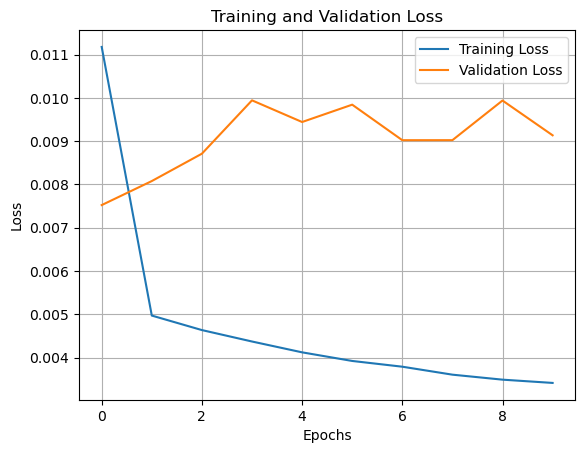

In [31]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
print(df['net_load'].mean())

141.61744956203677


### Plot Training Results

In [33]:
X_train_input = X_train[::n_output]
y_train_input = y_train[::n_output]

In [34]:
print(f"n_ouput: {n_output}")

n_ouput: 72


1/1 [==============================] - 0s 20ms/step


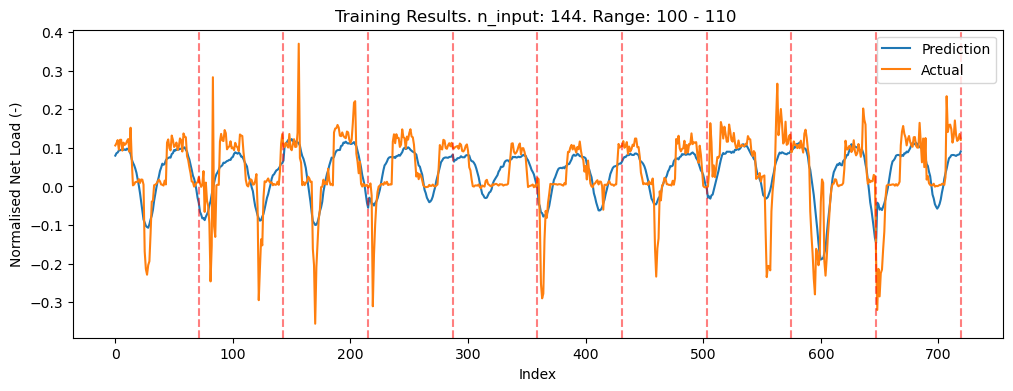

In [36]:
start_section = 100
end_section = 110
diff = end_section-start_section


predictions = []

for i in X_train_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Training Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_train_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

### Plot Testing Results

In [37]:
X_test_input = X_test[::n_output]
y_test_input = y_test[::n_output]

1/1 [==============================] - 0s 21ms/step


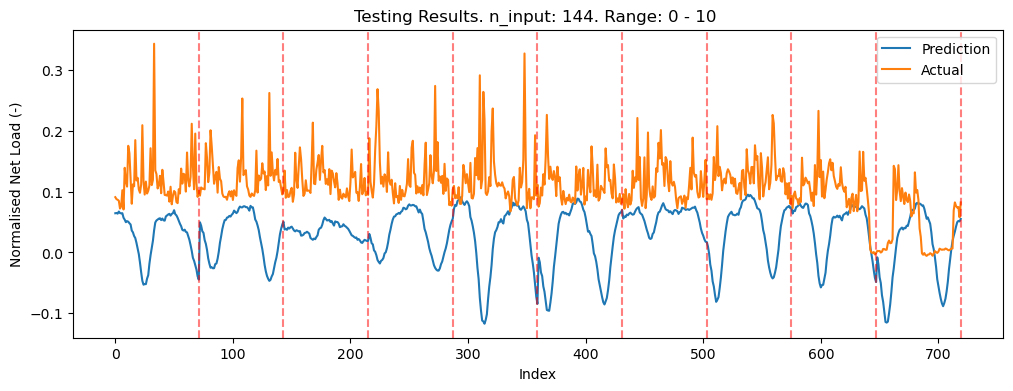

In [38]:
start_section = 0
end_section = 10
diff = end_section-start_section


predictions = []

for i in X_test_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Testing Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_test_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

# <center><u> GRU Model 2

In [39]:
X, y = [], []
for i in range(len(df_input) - n_input - n_output + 1):
    # Select all columns for the input sequence
    X.append(df_input.iloc[i:(i + n_input)].values)  
    
    y.append(df_input['net_load'].iloc[(i + n_input):(i + n_input + n_output)].values)

X = np.array(X).reshape((len(X), n_input, -1))  
y = np.array(y)

In [40]:
n_split = 2 * 24 * 300 

X_train = X[:n_split]
y_train = y[:n_split]

X_test = X[n_split:]
y_test = y[n_split:]

In [43]:
model2 = Sequential()
model2.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(GRU(64, activation='relu', return_sequences=True ))
model2.add(GRU(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(y_train.shape[1]))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 144, 128)          54528     
                                                                 
 dropout_3 (Dropout)         (None, 144, 128)          0         
                                                                 
 gru_7 (GRU)                 (None, 144, 64)           37248     
                                                                 
 gru_8 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 72)                4680      
                                                                 
Total params: 121,416
Trainable params: 121,416
Non-tr

In [44]:
cp2 = ModelCheckpoint('model2.keras', save_best_only=True)
model2.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[MeanSquaredError(), MeanAbsoluteError()])

In [45]:
# history = model1.fit(X_train, y_train, epochs=10, callbacks=[cp1], batch_size=16, validation_split=0.1)
history2 = model2.fit(X_train, y_train, epochs=2, batch_size=16, validation_split=0.1)

Epoch 1/2
810/810 [==============================] - 65s 79ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - mean_absolute_error: 0.0822 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0716
Epoch 2/2
810/810 [==============================] - 67s 83ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0597 - val_loss: 0.0051 - val_mean_squared_error: 0.0051 - val_mean_absolute_error: 0.0568


### Check Training Results

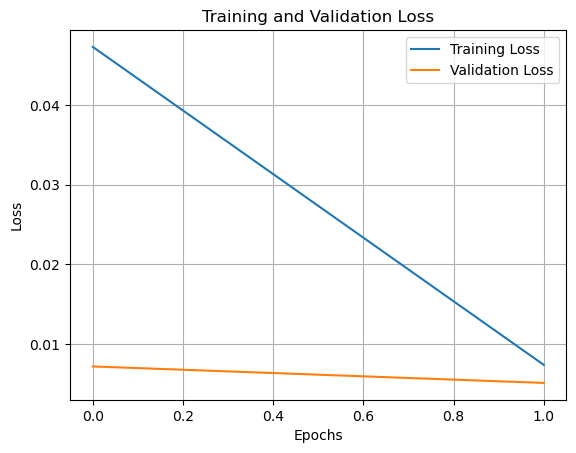

In [46]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Plot Training Results

In [48]:
X_train_input = X_train[::n_output]
y_train_input = y_train[::n_output]

1/1 [==============================] - 0s 20ms/step


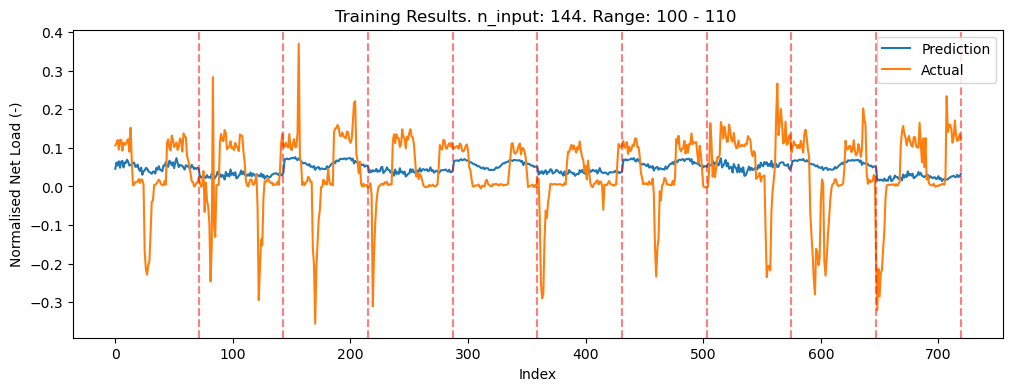

In [50]:
start_section = 100
end_section = 110
diff = end_section-start_section


predictions = []

for i in X_train_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model2.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Training Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_train_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

### Ploting Test Results

In [51]:
X_test_input = X_test[::n_output]
y_test_input = y_test[::n_output]

1/1 [==============================] - 0s 21ms/step


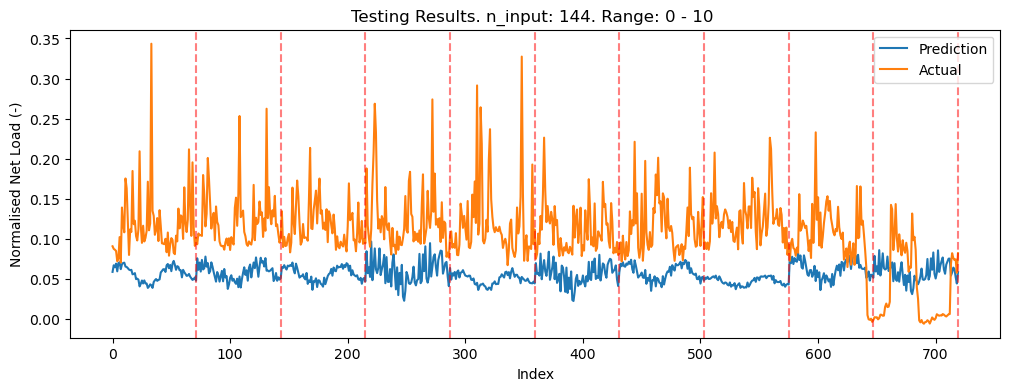

In [52]:
start_section = 0
end_section = 10
diff = end_section-start_section


predictions = []

for i in X_test_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model2.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Testing Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_test_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

# <center><u> GRU Model 3

In [54]:
model3 = Sequential()
model3.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model3.add(Dropout(0.2))
model3.add(GRU(64, activation='relu', return_sequences=True ))
model3.add(GRU(64, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(y_train.shape[1]))

In [55]:
#Make learning Rate 0.01 instead of 0.001
cp3 = ModelCheckpoint('model3.keras', save_best_only=True)
model3.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=[MeanSquaredError(), MeanAbsoluteError()])

In [56]:
# history = model1.fit(X_train, y_train, epochs=10, callbacks=[cp1], batch_size=16, validation_split=0.1)
history3 = model3.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.1)

Epoch 1/5
810/810 [==============================] - 71s 87ms/step - loss: 0.0291 - mean_squared_error: 0.0291 - mean_absolute_error: 0.0760 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0756
Epoch 2/5
810/810 [==============================] - 71s 88ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0544 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0733
Epoch 3/5
810/810 [==============================] - 68s 84ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - mean_absolute_error: 0.0513 - val_loss: 0.0065 - val_mean_squared_error: 0.0065 - val_mean_absolute_error: 0.0635
Epoch 4/5
810/810 [==============================] - 70s 87ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - mean_absolute_error: 0.0482 - val_loss: 0.0059 - val_mean_squared_error: 0.0059 - val_mean_absolute_error: 0.0580
Epoch 5/5
810/810 [==============================] - 69s 85ms/step - loss: 0.0047 - mean_squ

### Check Training Results

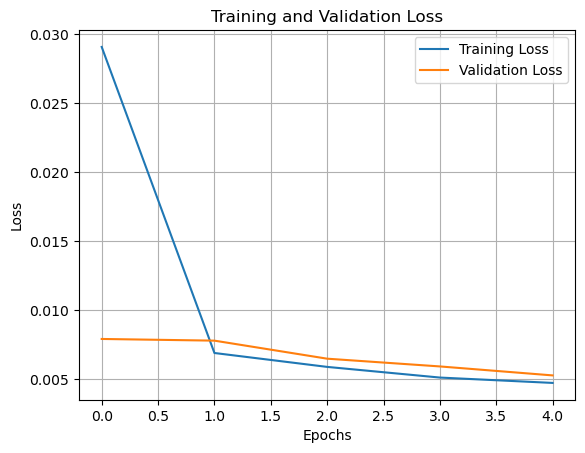

In [57]:
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Plot Training Results

In [58]:
X_train_input = X_train[::n_output]
y_train_input = y_train[::n_output]

1/1 [==============================] - 0s 21ms/step


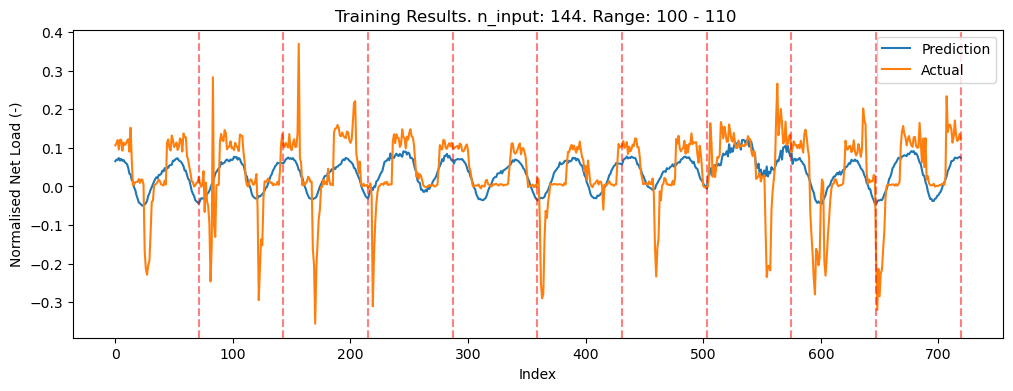

In [59]:
start_section = 100
end_section = 110
diff = end_section-start_section


predictions = []

for i in X_train_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model3.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Training Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_train_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

### Plot Test Results

In [60]:
X_test_input = X_test[::n_output]
y_test_input = y_test[::n_output]

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


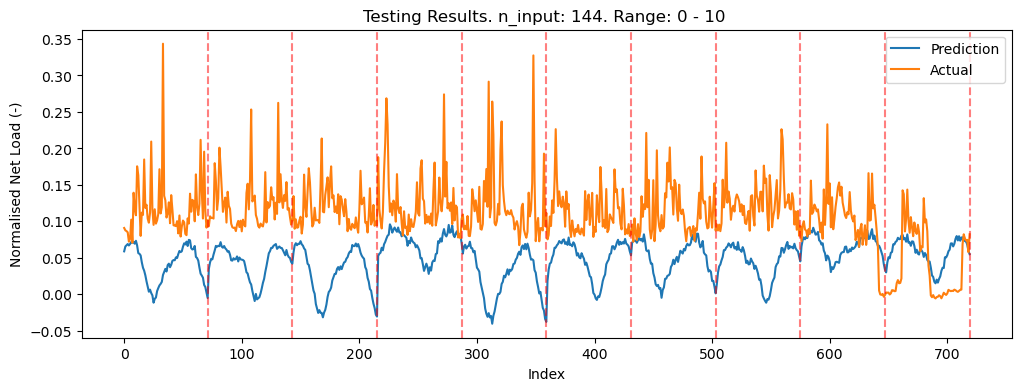

In [62]:
start_section = 0
end_section = 10
diff = end_section-start_section


predictions = []

for i in X_test_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model3.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Testing Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_test_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

# <center><u> GRU Model 4

In [32]:
X, y = [], []
for i in range(len(df_input) - n_input - n_output + 1):
    # Select all columns for the input sequence
    X.append(df_input.iloc[i:(i + n_input)].values)  
    
    y.append(df_input['net_load'].iloc[(i + n_input):(i + n_input + n_output)].values)

X = np.array(X).reshape((len(X), n_input, -1))  
y = np.array(y)

In [33]:
n_split = 2 * 24 * 300 

X_train = X[:n_split]
y_train = y[:n_split]

X_test = X[n_split:]
y_test = y[n_split:]

In [34]:
model4 = Sequential()
model4.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(GRU(64, activation='relu', return_sequences=True ))
model4.add(BatchNormalization())
model4.add(GRU(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(y_train.shape[1]))

In [35]:
#Make learning Rate 0.01 instead of 0.001
cp4 = ModelCheckpoint('model3.keras', save_best_only=True)
model4.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[MeanSquaredError(), MeanAbsoluteError()])

In [36]:
# history = model1.fit(X_train, y_train, epochs=10, callbacks=[cp1], batch_size=16, validation_split=0.1)
history4 = model4.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10


810/810 [==============================] - 76s 93ms/step - loss: 0.1142 - mean_squared_error: 0.1142 - mean_absolute_error: 0.2234 - val_loss: 0.0085 - val_mean_squared_error: 0.0085 - val_mean_absolute_error: 0.0704
Epoch 2/10
810/810 [==============================] - 75s 92ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - mean_absolute_error: 0.0714 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0641
Epoch 3/10
810/810 [==============================] - 77s 95ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - mean_absolute_error: 0.0455 - val_loss: 0.0066 - val_mean_squared_error: 0.0066 - val_mean_absolute_error: 0.0612
Epoch 4/10
810/810 [==============================] - 74s 91ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - mean_absolute_error: 0.0427 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0630
Epoch 5/10
810/810 [==============================] - 75s 93ms/step - loss: 0.0036 - mean_squared_e

### Check Training Results

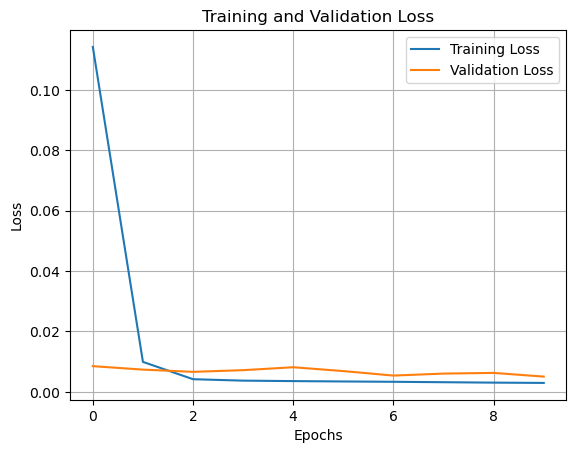

In [37]:
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Plot Training Results

In [38]:
X_train_input = X_train[::n_output]
y_train_input = y_train[::n_output]

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


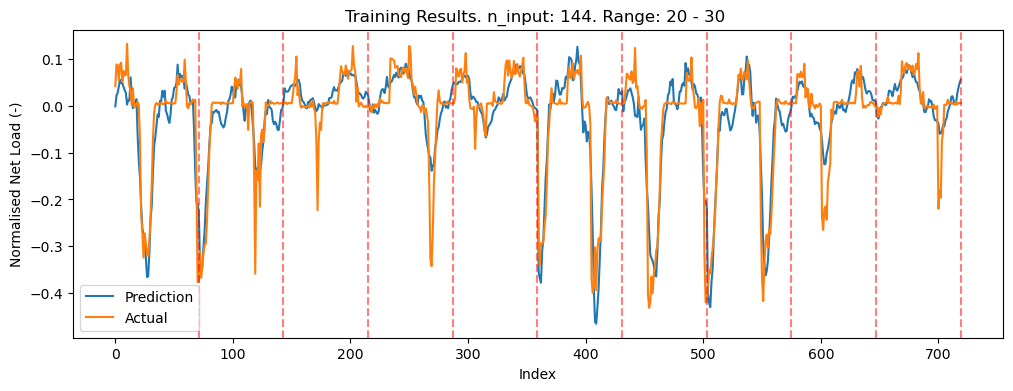

In [48]:
start_section = 20
end_section = 30
diff = end_section-start_section


predictions = []

for i in X_train_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model4.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Training Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_train_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

### Plot Test Results

In [40]:
X_test_input = X_test[::n_output]
y_test_input = y_test[::n_output]

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 20ms/step


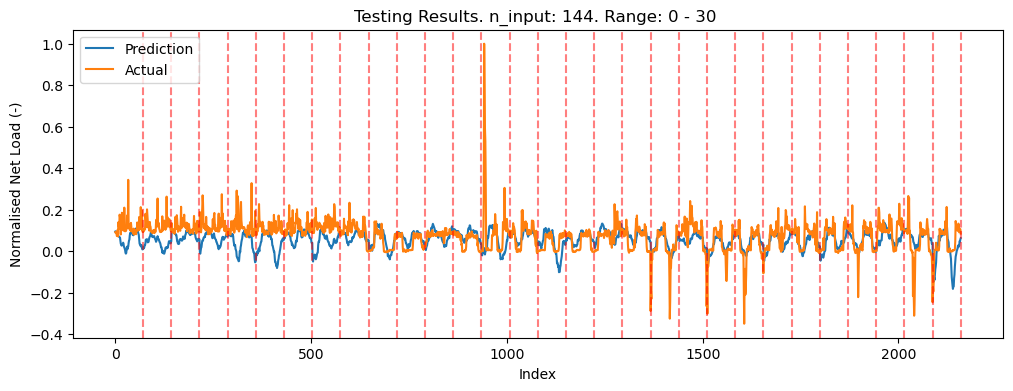

In [54]:
start_section = 0
end_section = 30
diff = end_section-start_section


predictions = []

for i in X_test_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model4.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Testing Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_test_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

# <center><u> GRU Model 5

In [55]:
model5 = Sequential()
model5.add(GRU(256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(GRU(128, activation='relu', return_sequences=True))
model5.add(BatchNormalization())
model5.add(GRU(64, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(y_train.shape[1]))

In [56]:
#Make learning Rate 0.01 instead of 0.001
cp5 = ModelCheckpoint('model5.keras', save_best_only=True)
model5.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=[MeanSquaredError(), MeanAbsoluteError()])

In [57]:
# history = model1.fit(X_train, y_train, epochs=10, callbacks=[cp1], batch_size=16, validation_split=0.1)
history5 = model5.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

Epoch 1/10
810/810 [==============================] - 178s 219ms/step - loss: 0.1125 - mean_squared_error: 0.1125 - mean_absolute_error: 0.2251 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0677
Epoch 2/10
810/810 [==============================] - 177s 219ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - mean_absolute_error: 0.0691 - val_loss: 0.0054 - val_mean_squared_error: 0.0054 - val_mean_absolute_error: 0.0511
Epoch 3/10
810/810 [==============================] - 173s 214ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - mean_absolute_error: 0.0445 - val_loss: 0.0053 - val_mean_squared_error: 0.0053 - val_mean_absolute_error: 0.0523
Epoch 4/10
810/810 [==============================] - 179s 221ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - mean_absolute_error: 0.0417 - val_loss: 0.0050 - val_mean_squared_error: 0.0050 - val_mean_absolute_error: 0.0497
Epoch 5/10
810/810 [==============================] - 186s 229ms/step - loss: 0.

### Check Training Results

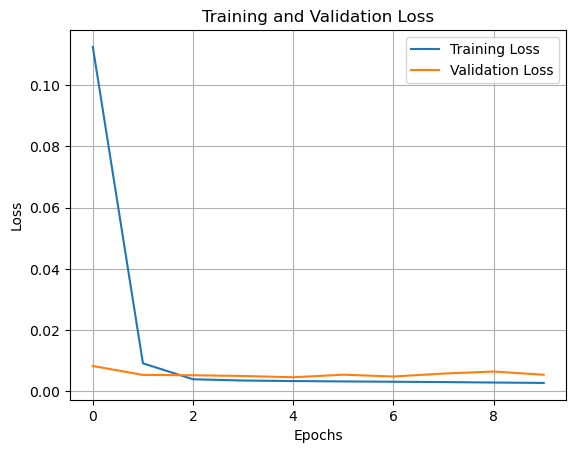

In [58]:
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### Plot Training Results

In [59]:
X_train_input = X_train[::n_output]
y_train_input = y_train[::n_output]

1/1 [==============================] - 0s 23ms/step


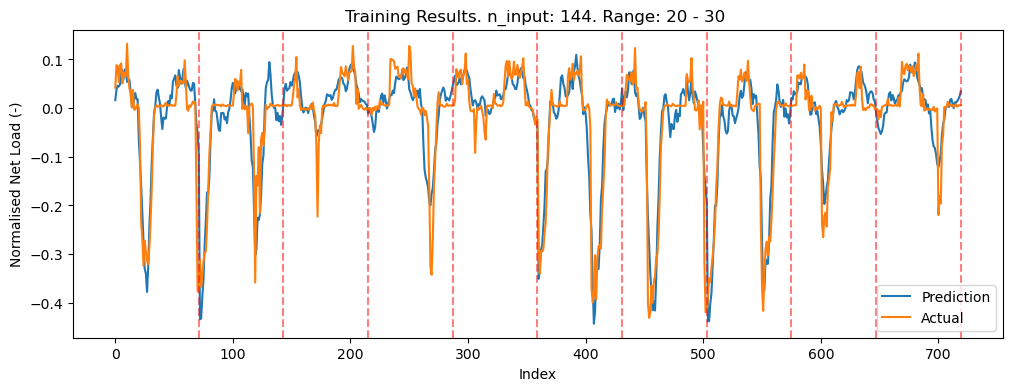

In [60]:
start_section = 20
end_section = 30
diff = end_section-start_section


predictions = []

for i in X_train_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model5.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Training Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_train_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()

### Plot Test Results

In [61]:
X_test_input = X_test[::n_output]
y_test_input = y_test[::n_output]

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


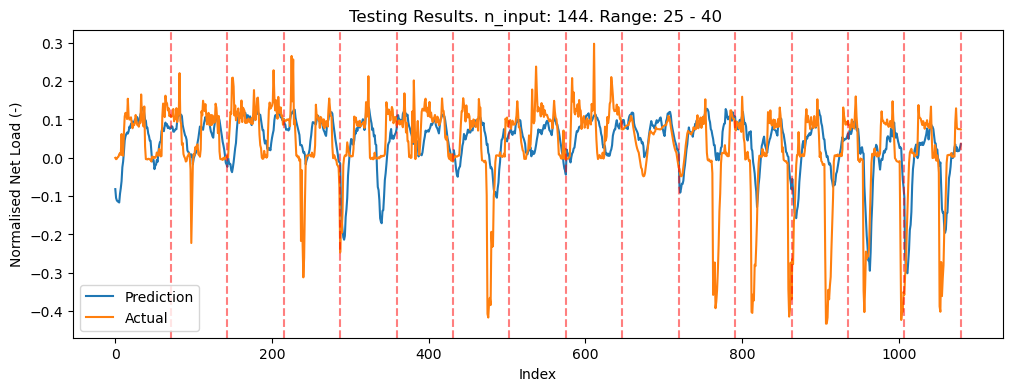

In [77]:
start_section = 25
end_section = 40
diff = end_section-start_section


predictions = []

for i in X_test_input[start_section:end_section]:
    i_reshaped = i.reshape(1, n_input, n_features)
    prediction = model5.predict(i_reshaped)

    prediction_list = list(prediction[0])
    predictions.append(prediction_list)

plt.figure(figsize=(12,4))
plt.title(f"Testing Results. n_input: {n_input}. Range: {start_section} - {end_section} ")
plt.plot(np.array(predictions).flatten(), label='Prediction')
plt.plot(y_test_input[start_section:end_section].flatten(), label = 'Actual')
plt.xlabel('Index')
plt.ylabel('Normalised Net Load (-)')

xcoords = [(i*n_output)-1+n_output for i in range(diff)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)


plt.legend()